# Loading the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


def load_data(filepath):
        return pd.read_csv(filepath, encoding='utf-8')


data = load_data('all_merged.csv')

print(data.head())


      annotator                      task  wordRT wordTag  sentRT      sentId  \
0  ex_ars_ann04  5fc4c3a06c71e4f6c7030515     656     DEM  177514  train-s852   
1  ex_ars_ann04  5fc4c3a06c71e4f6c7030515     341      VM  177514  train-s852   
2  ex_ars_ann04  5fc4c3a06c71e4f6c7030515    1022     SYM  177514  train-s852   
3  ex_ars_ann04  5fc4c3a06c71e4f6c7030515    1008    INTF  177514  train-s852   
4  ex_ars_ann04  5fc4c3a06c71e4f6c7030515    3685    PRON  177514  train-s852   

       word                                               text  freq  length  \
0  उन्होंने  उन्होंने कहा! दरअसल मैंने इसे एक पत्रिका में र...  6.31     8.0   
1       कहा  उन्होंने कहा! दरअसल मैंने इसे एक पत्रिका में र...  6.48     3.0   
2         !  उन्होंने कहा! दरअसल मैंने इसे एक पत्रिका में र...  4.46     1.0   
3     दरअसल  उन्होंने कहा! दरअसल मैंने इसे एक पत्रिका में र...  4.62     5.0   
4     मैंने  उन्होंने कहा! दरअसल मैंने इसे एक पत्रिका में र...  4.35     5.0   

  gold  
0  PRP  
1   VM  
2  SY

# Looking at some statistics

In [3]:
#Statistics
unique_sentences = data['text'].nunique()
unique_words = data['word'].nunique()

# Generate a contingency table for annotator by wordTag
contingency_table = pd.crosstab(data['annotator'], data['wordTag'])

print("Unique Sentences:", unique_sentences)
print("Unique Words:", unique_words)
print("\nContingency Table (Annotator by WordTag):\n", contingency_table)


Unique Sentences: 349
Unique Words: 1937

Contingency Table (Annotator by WordTag):
 wordTag        CC  DEM  ECH  INJ  INTF   JJ  JJP  NEG    NN  NNC  ...  QF  QO  \
annotator                                                         ...           
ex_aan_ann02  201   81    0    0    11  309   34   23  1214  130  ...  44  16   
ex_ars_ann04  257  276   14    9   159  404   44   23   730  195  ...  68  19   
ex_sar_ann03  185    0    4    1    21  449    1   21  1196  101  ...   2  12   
ex_shr_ann01  205  137    3    0    28  411    4   23  1264   71  ...  44  18   

wordTag        RB  RDP   RP  SYM  UNK  VAUX   VM  WQ  
annotator                                             
ex_aan_ann02  189    7   90  461    0   464  627   9  
ex_ars_ann04  224   10    2  458    1   420  766   9  
ex_sar_ann03  156    9   82  421    0   377  597   8  
ex_shr_ann01  184    4  111  455    1   429  646  10  

[4 rows x 26 columns]


In [12]:
#Statistics
unique_annotators = data['annotator'].nunique()
unique_word_tags = data['wordTag'].nunique()
number_of_columns = data.shape[1]
number_of_rows = data.shape[0]


print(f"Number of unique annotators: {unique_annotators}")
print(f"Number of unique word tags: {unique_word_tags}")
print(f"Number of columns in the dataset: {number_of_columns}")
print(f"Number of rows in the dataset: {number_of_rows}")


# Frequency of each word tag
word_tag_frequency = data['wordTag'].value_counts()
print("Frequency of each word tag:")
print(word_tag_frequency)

# Average word response time
average_word_rt = data['wordRT'].mean()
print(f"Average Word Response Time: {average_word_rt:.2f} ms")

# Average sentence response time
average_sent_rt = data['sentRT'].mean()
print(f"Average Sentence Response Time: {average_sent_rt:.2f} ms")

# Display unique values if needed for deeper analysis
unique_annotators_list = data['annotator'].unique()
print("List of unique annotators:")
print(unique_annotators_list)


Number of unique annotators: 4
Number of unique word tags: 26
Number of columns in the dataset: 13
Number of rows in the dataset: 23743
Frequency of each word tag:
wordTag
NN      4404
PSP     4243
VM      2636
SYM     1795
NNP     1715
VAUX    1690
JJ      1573
PRON     863
CC       848
RB       753
NNPC     603
QC       533
NNC      497
DEM      494
RP       285
INTF     219
QF       158
NST       96
NEG       90
JJP       83
QO        65
WQ        36
RDP       30
ECH       21
INJ       10
UNK        2
Name: count, dtype: int64
Average Word Response Time: 4635.57 ms
Average Sentence Response Time: 224835.75 ms
List of unique annotators:
['ex_ars_ann04' 'ex_shr_ann01' 'ex_aan_ann02' 'ex_sar_ann03']


In [13]:
# Frequency and description data for each word tag

data = {
    "Word Tag": ["NN", "PSP", "VM", "SYM", "NNP", "VAUX", "JJ", "PRON", "CC", "RB", "NNPC", "NNC", "QC", "DEM", "RP",
                 "INTF", "QF", "NEG", "NST", "JJP", "QO", "WQ", "RDP", "ECH", "INJ", "UNK"],
    "Frequency": [6562, 6359, 3947, 2647, 2608, 2523, 2468, 1307, 1283, 1193, 1007, 730, 708, 693, 417, 319, 218, 153,
                  144, 114, 92, 48, 39, 31, 15, 3],
    "Description": [
        "Noun, Common - Generic objects, people, etc.",
        "Postposition - Similar to prepositions in English",
        "Verb, Main - Main action in a clause",
        "Symbol - Non-alphanumeric symbols, punctuation",
        "Noun, Proper - Names of specific entities",
        "Verb, Auxiliary - Helps the main verb",
        "Adjective - Describes nouns or pronouns",
        "Pronoun - Replaces nouns, often to avoid repetition",
        "Coordinating Conjunction - Connects words, phrases, clauses",
        "Adverb - Modifies verbs, adjectives, or other adverbs",
        "Noun, Compound - Part of a compound noun",
        "Noun, Compound Common - A common noun in compounds",
        "Quantifier, Cardinal - Numerical quantities",
        "Demonstrative - Demonstrative determiners or pronouns",
        "Particle - A grammatical particle",
        "Intensifier - Intensifies meaning of another word",
        "Quantifier, Frequentative - Frequency of an action",
        "Negative - Negation words",
        "Noun, Spatial Term - Indicates location or spatial relations",
        "Adjective, Comparative - Comparative form of adjectives",
        "Quantifier, Ordinal - Ordinal numbers",
        "Wh-question - Question formation words",
        "Reduplicative - Words indicating repetition",
        "Echo - Replicates sounds or words",
        "Interjection - Expresses sudden or strong feelings",
        "Unknown - Unclear or unknown tags"
    ]
}


df_word_tags = pd.DataFrame(data)

display(df_word_tags)

,Word Tag,Frequency,Description
0,NN,6562,"Noun, Common - Generic objects, people, etc."
1,PSP,6359,Postposition - Similar to prepositions in English
2,VM,3947,"Verb, Main - Main action in a clause"
3,SYM,2647,"Symbol - Non-alphanumeric symbols, punctuation"
4,NNP,2608,"Noun, Proper - Names of specific entities"
5,VAUX,2523,"Verb, Auxiliary - Helps the main verb"
6,JJ,2468,Adjective - Describes nouns or pronouns
7,PRON,1307,"Pronoun - Replaces nouns, often to avoid repet..."
8,CC,1283,"Coordinating Conjunction - Connects words, phr..."
9,RB,1193,"Adverb - Modifies verbs, adjectives, or other ..."


# Visualization

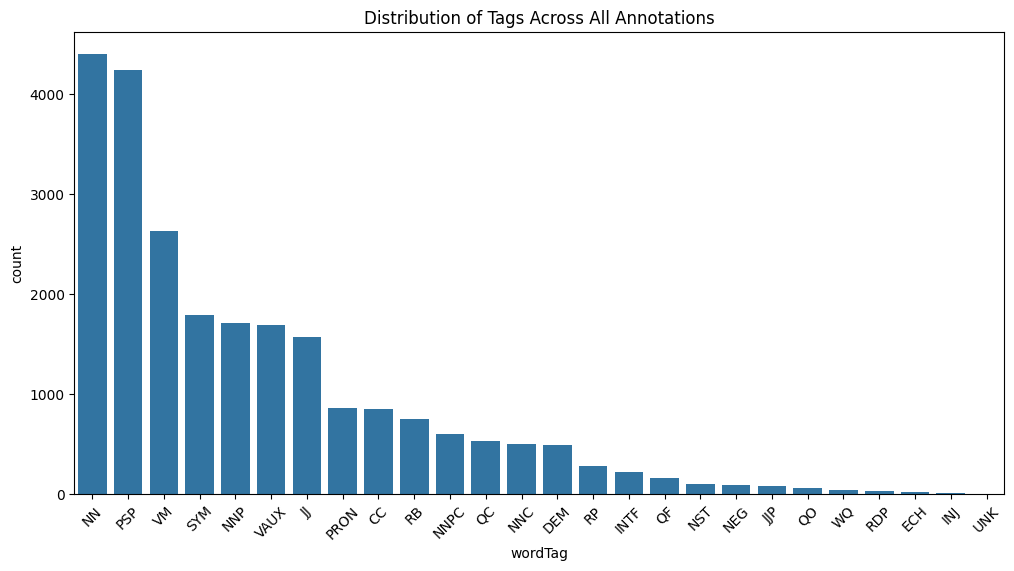

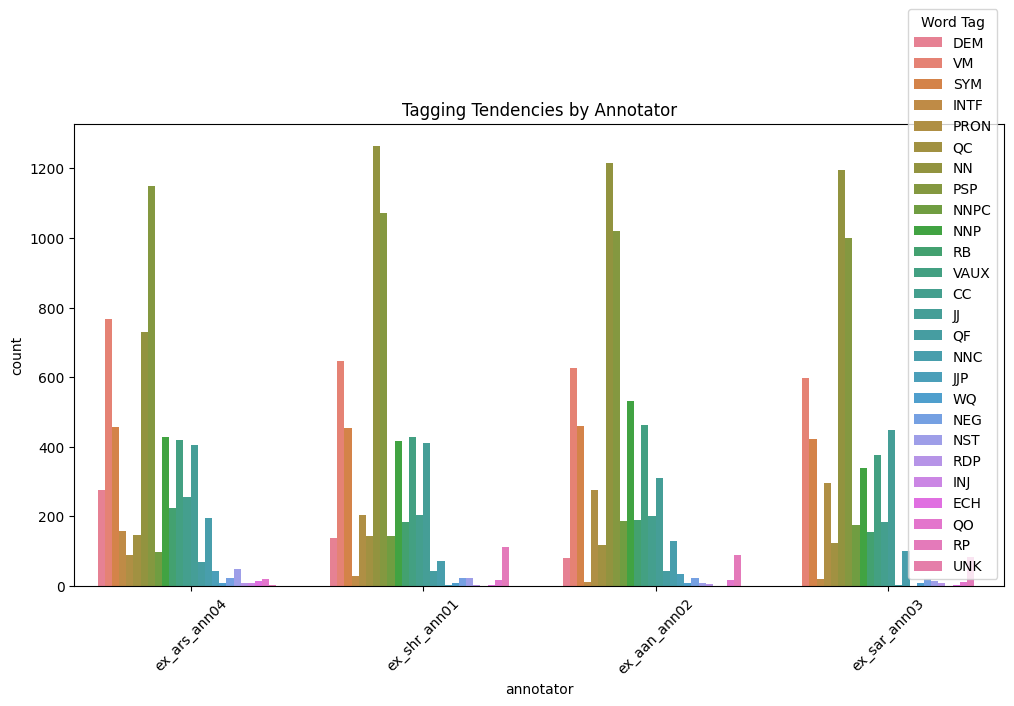

In [4]:
# Visualizing the distribution of tags
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='wordTag', order=data['wordTag'].value_counts().index)
plt.title('Distribution of Tags Across All Annotations')
plt.xticks(rotation=45)
plt.show()

# Visualizing annotator bias or tendency
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='annotator', hue='wordTag')
plt.title('Tagging Tendencies by Annotator')
plt.xticks(rotation=45)
plt.legend(title='Word Tag')
plt.show()

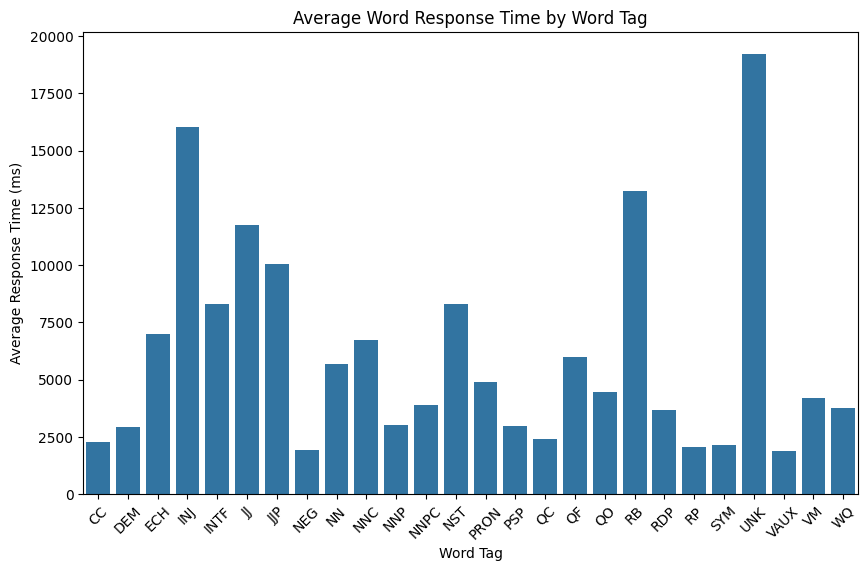

In [6]:
# Average word response time by wordTag
avg_word_rt_by_tag = data.groupby('wordTag')['wordRT'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_word_rt_by_tag.index, y=avg_word_rt_by_tag.values)
plt.title('Average Word Response Time by Word Tag')
plt.xlabel('Word Tag')
plt.ylabel('Average Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

# Contingency table

In [8]:
data['mismatch'] = data['wordTag'] != data['gold']

# Creating a contingency table that shows for each annotator how many times they gave untrue labels
contingency_table = pd.crosstab(data['annotator'], data['mismatch'])


print(contingency_table)

mismatch      False  True 
annotator                 
ex_aan_ann02   4758   1291
ex_ars_ann04   3789   2260
ex_sar_ann03   4445   1151
ex_shr_ann01   5100    949


# Looking at the mismatches by annotators

In [9]:
# Display the column names to ensure they match our expected names
print("Column names in the dataset:", data.columns.tolist())

# Check for mismatches between the annotator's label and the gold standard
data['mismatch'] = data['wordTag'] != data['gold']

# Count mismatches by POS tag for all annotators combined
total_mismatches_by_tag = data[data['mismatch']].groupby('wordTag').size().sort_values(ascending=False)

# Count mismatches by POS tag for each individual annotator
mismatches_by_tag_and_annotator = data[data['mismatch']].groupby(['annotator', 'wordTag']).size().unstack(fill_value=0).sort_values(by='annotator', ascending=False)

print("Total mismatches by POS tag (all annotators combined):", total_mismatches_by_tag)
print("Mismatches by POS tag for each annotator:", mismatches_by_tag_and_annotator)


Column names in the dataset: ['annotator', 'task', 'wordRT', 'wordTag', 'sentRT', 'sentId', 'word', 'text', 'freq', 'length', 'gold', 'mismatch']
Total mismatches by POS tag (all annotators combined): wordTag
PRON    863
RB      682
NN      523
VM      465
JJ      450
NNP     432
PSP     306
VAUX    284
SYM     250
DEM     241
NNC     236
NNPC    166
INTF    161
QC      119
QF       91
CC       88
JJP      83
NST      72
RP       55
QO       46
ECH      21
INJ      10
RDP       2
UNK       2
NEG       1
WQ        1
dtype: int64
Mismatches by POS tag for each annotator: wordTag       CC  DEM  ECH  INJ  INTF   JJ  JJP  NEG   NN  NNC  ...  QF  QO  \
annotator                                                       ...           
ex_shr_ann01  11   40    3    0    10   38    4    0  112   11  ...  11  11   
ex_sar_ann03   6    0    4    1     3  134    1    0  160   35  ...   1   6   
ex_ars_ann04  63  183   14    9   143  228   44    1  106  134  ...  66  19   
ex_aan_ann02   8   18    0   

# Visualizing the top 5 mislabelled POS tags by each of the annotators

In [10]:
# Calculate discrepancy between annotator's labels and gold labels
data['is_correct'] = data['wordTag'] == data['gold']

# Filter out correct labels
wrong_labels = data[data['is_correct'] == False]

# Group wrong labels by annotator and count occurrences
annotator_wrong_counts = wrong_labels.groupby(['annotator', 'wordTag']).size().reset_index(name='count')

# Sort counts and select top 5 POS tags for each annotator
top_5_pos_tags = annotator_wrong_counts.groupby('annotator').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

print(top_5_pos_tags)


       annotator wordTag  count
0   ex_aan_ann02    PRON    275
1   ex_aan_ann02     NNP    178
2   ex_aan_ann02      RB    163
3   ex_aan_ann02      NN    145
4   ex_aan_ann02    NNPC     83
5   ex_ars_ann04      VM    326
6   ex_ars_ann04      JJ    228
7   ex_ars_ann04      RB    220
8   ex_ars_ann04     DEM    183
9   ex_ars_ann04     PSP    158
10  ex_sar_ann03    PRON    297
11  ex_sar_ann03      NN    160
12  ex_sar_ann03      RB    139
13  ex_sar_ann03      JJ    134
14  ex_sar_ann03     NNP     64
15  ex_shr_ann01    PRON    203
16  ex_shr_ann01      RB    160
17  ex_shr_ann01      NN    112
18  ex_shr_ann01     SYM     63
19  ex_shr_ann01     NNP     60


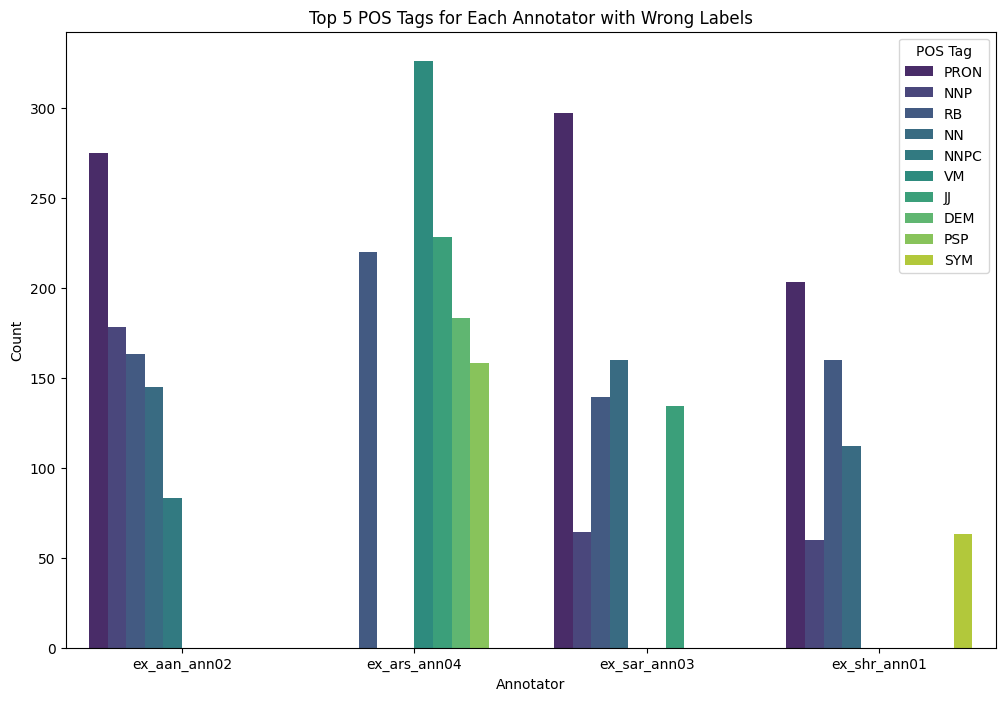

In [11]:
#Top 5 POS Tags for Each Annotator with Wrong Labels
plt.figure(figsize=(12, 8))
sns.barplot(x='annotator', y='count', hue='wordTag', data=top_5_pos_tags, palette='viridis')
plt.title('Top 5 POS Tags for Each Annotator with Wrong Labels')
plt.xlabel('Annotator')
plt.ylabel('Count')
plt.legend(title='POS Tag')
plt.show()

# Implementing the David-Skene algorithm

In [32]:
def main():
    """
    Main execution function that loads data, runs the EM algorithm, and evaluates its performance.
    It loads the data from a CSV file, processes it, runs the expectation-maximization algorithm
    to predict part-of-speech tags, and evaluates the accuracy against gold standard labels.
    """

    responses, gold_labels = read_and_format_data("all_merged.csv")

    words, observers, classes, counts = create_counts_matrix(responses)
    # Create a reverse lookup for class indices
    class_indices = {classes[i]: i for i in range(len(classes))}

    # Run the EM algorithm
    patient_classes = run(responses)

    # Evaluate performance
    accuracy, mispredictions = evaluate_performance(patient_classes, words, class_indices, gold_labels)
    print(f"\n\n Accuracy: {accuracy:.2f}")

    if mispredictions:
        print("\n\n Mispredictions:")
        for word, predicted, correct in mispredictions:
            print(f"Word: {word}, Predicted: {predicted}, Correct: {correct}")




def read_and_format_data(file_path):
    """
    Initializes the probabilities for each word to belong to a class based on the frequency of annotations.

    Args:
        counts (np.array): A 3D array of shape [nWords, nObservers, nClasses] representing the counts of each tag from each annotator for each word.

    Returns:
        np.array: An initialized array of shape [nWords, nClasses] representing the initial probabilities.
    """

    df = pd.read_csv(file_path)
    relevant_data = df[['word', 'annotator', 'wordTag', 'gold']]

    data_dict = {}
    gold_labels = {}

    for index, row in relevant_data.iterrows():
        word = row['word']
        annotator = row['annotator']
        wordTag = row['wordTag']
        goldLabel = row['gold']

        if word not in data_dict:
            data_dict[word] = {}
        if annotator not in data_dict[word]:
            data_dict[word][annotator] = []

        data_dict[word][annotator].append(wordTag)
        gold_labels[word] = goldLabel  # Store gold label for each word

    return data_dict, gold_labels


def create_counts_matrix(formatted_data):
    """
    Creates a counts matrix from annotated data for use in the EM algorithm.

    Args:
        formatted_data (dict): A dictionary where keys are words and values are another dictionary of annotators and their tags.

    Returns:
        tuple: A tuple containing lists of words, annotators, tags, and the counts matrix.
    """


    # Extract unique words, annotators, and tags
    words = list(formatted_data.keys())
    annotators = set()
    tags = set()

    for word_annotations in formatted_data.values():
        for annotator, tag_list in word_annotations.items():
            annotators.add(annotator)
            tags.update(tag_list)

    # Convert sets to lists and sort (to ensure consistent indexing)
    annotators = sorted(list(annotators))
    tags = sorted(list(tags))

    # Create a mapping for word, annotator, and tag to their indices
    word_index = {word: i for i, word in enumerate(words)}
    annotator_index = {annotator: i for i, annotator in enumerate(annotators)}
    tag_index = {tag: i for i, tag in enumerate(tags)}

    # Initialize the counts matrix
    counts = np.zeros((len(words), len(annotators), len(tags)), dtype=int)

    # Populate the counts matrix
    for word, annotations in formatted_data.items():
        for annotator, tag_list in annotations.items():
            for tag in tag_list:
                i = word_index[word]
                j = annotator_index[annotator]
                k = tag_index[tag]
                counts[i, j, k] += 1

    return words, annotators, tags, counts



def run(responses, tol=0.00001, max_iter=40, init='average'):
    """
    Runs the EM algorithm on the provided data until convergence or maximum iterations are reached.

    Args:
        responses (dict): A dictionary of responses formatted by read_and_format_data.
        tol (float): The tolerance level for convergence.
        max_iter (int): The maximum number of iterations to perform.
        init (str): The method of initialization ('average' or other methods if specified).

    Returns:
        np.array: The final probabilities of classes (POS tags) for each word.
    """

    # convert responses to counts
    (words, observers, classes, counts) = create_counts_matrix(responses)
    print("num Words:", len(words))
    print ("\n\n Annotators:", observers)
    print ("\n\n Classes (POS tags):", classes)

    # initialize
    iter = 0
    converged = False
    old_class_marginals = None
    old_error_rates = None

    POS_classes = initialize(counts)

    print("\n\n Iter\tlog-likelihood\tdelta-CM\tdelta-ER")

    # while not converged do:
    while not converged:
        iter += 1

        # M-step
        (class_marginals, error_rates) = m_step(counts, POS_classes)

        # E-setp
        POS_classes = e_step(counts, class_marginals, error_rates)

        # check likelihood
        log_L = calc_likelihood(counts, class_marginals, error_rates)

        # check for convergence
        if old_class_marginals is not None:
            class_marginals_diff = np.sum(np.abs(class_marginals - old_class_marginals))
            error_rates_diff = np.sum(np.abs(error_rates - old_error_rates))
            print(iter ,'\t', log_L, '\t%.6f\t%.6f' % (class_marginals_diff, error_rates_diff))
            if (class_marginals_diff < tol and error_rates_diff < tol) or iter > max_iter:
                converged = True
        else:
            print(iter ,'\t', log_L)

        # update current values
        old_class_marginals = class_marginals
        old_error_rates = error_rates

    # Print final results
    np.set_printoptions(precision=2, suppress=True)
    print ("\n\n Class marginals")
    print(class_marginals)
    print("\n\n Error rates")
    print(error_rates)

    print("\n\n Incidence-of-error rates")
    [nWords, nObservers, nClasses] = np.shape(counts)
    for k in range(nObservers):
        print(class_marginals * error_rates[k,:,:])

    #np.set_printoptions(precision=4, suppress=True)
    #print("POS classes")
    #for i in range(nWords):
        #print(words[i], POS_classes[i,:])

    return(POS_classes)



def initialize(counts):
    """
    Initializes the probabilities for each word to belong to a class based on the frequency of annotations.

    Args:
        counts (np.array): A 3D array of shape [nWords, nObservers, nClasses] representing the counts of each tag from each annotator for each word.

    Returns:
        np.array: An initialized array of shape [nWords, nClasses] representing the initial probabilities.
    """


    [nWords, nObservers, nClasses] = np.shape(counts)
    # sum over observers
    response_sums = np.sum(counts,1)
    # create an empty array
    POS_classes = np.zeros([nWords, nClasses])
    # for each word, take the average number of observations in each class
    for p in range(nWords):
        POS_classes[p,:] = response_sums[p,:] / np.sum(response_sums[p,:],dtype=float)

    return POS_classes



def m_step(counts, POS_classes):
    """
    Performs the M-step of the EM algorithm, recalculating class probabilities and error rates.

    Args:
        counts (np.array): The counts matrix from create_counts_matrix.
        POS_classes (np.array): The current estimates of class probabilities for each word.

    Returns:
        tuple: A tuple containing the updated class marginals and error rates.
    """

    [nWords, nObservers, nClasses] = np.shape(counts)

    # compute class marginals
    class_marginals = np.sum(POS_classes,0)/float(nWords)

    # compute error rates
    error_rates = np.zeros([nObservers, nClasses, nClasses])
    for k in range(nObservers):
        for j in range(nClasses):
            for l in range(nClasses):
                error_rates[k, j, l] = np.dot(POS_classes[:,j], counts[:,k,l])
            # normalize by summing over all observation classes
            sum_over_responses = np.sum(error_rates[k,j,:])
            if sum_over_responses > 0:
                error_rates[k,j,:] = error_rates[k,j,:]/float(sum_over_responses)

    return (class_marginals, error_rates)



def e_step(counts, class_marginals, error_rates):
    """
    Performs the E-step of the EM algorithm, updating the class probabilities for each word based on the current model parameters.

    Args:
        counts (np.array): The counts matrix from create_counts_matrix.
        class_marginals (np.array): The current estimates of class marginals.
        error_rates (np.array): The current estimates of error rates.

    Returns:
        np.array: Updated probabilities of classes for each word.
    """

    [nWords, nObservers, nClasses] = np.shape(counts)

    POS_classes = np.zeros([nWords, nClasses])

    for i in range(nWords):
        for j in range(nClasses):
            estimate = class_marginals[j]
            estimate *= np.prod(np.power(error_rates[:,j,:], counts[i,:,:]))

            POS_classes[i,j] = estimate
        # normalize error rates by dividing by the sum over all observation classes
        word_sum = np.sum(POS_classes[i,:])
        if word_sum > 0:
            POS_classes[i,:] = POS_classes[i,:]/float(word_sum)

    return POS_classes



def calc_likelihood(counts, class_marginals, error_rates):
    """
    Calculates the log-likelihood of the data given the current parameter estimates of the model.

    Args:
        counts (np.array): The counts matrix.
        class_marginals (np.array): The class marginal probabilities.
        error_rates (np.array): The error rates matrix.

    Returns:
        float: The log-likelihood of the data.
    """


    [nWords, nObservers, nClasses] = np.shape(counts)
    log_L = 0.0

    for i in range(nWords):
        POS_likelihood = 0.0
        for j in range(nClasses):

            class_prior = class_marginals[j]
            POS_class_likelihood = np.prod(np.power(error_rates[:,j,:], counts[i,:,:]))
            POS_class_posterior = class_prior * POS_class_likelihood
            POS_likelihood += POS_class_posterior

        temp = np.logaddexp(log_L, np.log(POS_likelihood))

        if np.isnan(temp) or np.isinf(temp):
            print(i, log_L, np.log(POS_likelihood), temp)
            sys.exit()

        log_L = temp

    return log_L



def random_initialization(counts):
    """
    Initializes the class probabilities randomly based on the weighted distribution of the counts.

    Args:
        counts (np.array): The counts matrix.

    Returns:
        np.array: Randomly initialized class probabilities for each word.
    """

    [nWords, nObservers, nClasses] = np.shape(counts)

    response_sums = np.sum(counts,1)

    # create an empty array
    POS_classes = np.zeros([nWords, nClasses])

    # for each word, choose a random initial class, weighted in proportion
    # to the counts from all observers
    for p in range(nWords):
        average = response_sums[p,:] / np.sum(response_sums[p,:],dtype=float)
        POS_classes[p,np.random.choice(np.arange(nClasses), p=average)] = 1

    return POS_classes



def majority_voting(counts):
    """
    Initializes the class probabilities based on majority voting from the annotations.

    Args:
        counts (np.array): The counts matrix.

    Returns:
        np.array: Initialized class probabilities where each word's class is set to the most frequently observed tag.
    """

    [nWords, nObservers, nClasses] = np.shape(counts)
    # sum over observers
    response_sums = np.sum(counts,1)

    # create an empty array
    POS_classes = np.zeros([nWords, nClasses])

    # take the most frequent class for each WORD
    for p in range(nWords):
        indices = np.argwhere(response_sums[p,:] == np.max(response_sums[p,:]))
        # in the case of ties, take the lowest valued label (could be randomized)
        POS_classes[p, np.min(indices)] = 1

    return POS_classes



def evaluate_performance(POS_classes, words, class_indices, gold_labels):
    """
    Evaluates the performance of the EM predictions against gold standard labels and identifies mispredictions.

    Args:
        POS_classes (np.array): Probabilities of classes assigned by the EM algorithm.
        words (list): List of words corresponding to rows in POS_classes.
        class_indices (dict): Mapping of classes to their indices.
        gold_labels (dict): Correct class labels for each word.

    Returns:
        tuple: A tuple containing the accuracy of predictions and a list of mispredictions.
    """

    correct_predictions = 0
    mispredictions = []  # To store the details of mispredicted words

    for i, word in enumerate(words):
        predicted_class_index = np.argmax(POS_classes[i])
        predicted_class = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]
        if predicted_class == gold_labels.get(word):
            correct_predictions += 1
        else:
            # Collect information about mispredicted words
            mispredictions.append((word, predicted_class, gold_labels.get(word)))

    accuracy = correct_predictions / len(words)
    return accuracy, mispredictions



if __name__ == '__main__':
    main()


num Words: 2510


 Annotators: ['ex_aan_ann02', 'ex_ars_ann04', 'ex_sar_ann03', 'ex_shr_ann01']


 Classes (POS tags): ['CC', 'DEM', 'ECH', 'INJ', 'INTF', 'JJ', 'JJP', 'NEG', 'NN', 'NNC', 'NNP', 'NNPC', 'NST', 'PRON', 'PSP', 'QC', 'QF', 'QO', 'RB', 'RDP', 'RP', 'SYM', 'UNK', 'VAUX', 'VM', 'WQ']


 Iter	log-likelihood	delta-CM	delta-ER


<ipython-input-32-039e333ded2f>:303: RuntimeWarning: divide by zero encountered in log
  temp = np.logaddexp(log_L, np.log(POS_likelihood))


1 	 3.983241622291589
2 	 4.347314936082141 	0.087710	35.426196
3 	 4.360204438480911 	0.027061	6.289648
4 	 4.3646145937721235 	0.011619	2.974503
5 	 4.3664860457748755 	0.006861	1.380122
6 	 4.369913330946738 	0.004806	1.124331
7 	 4.372070667779111 	0.004365	0.666612
8 	 4.372032639373432 	0.002902	0.279724
9 	 4.371276513983489 	0.001327	0.199600
10 	 4.368649111899595 	0.001474	0.400091
11 	 4.367271392655679 	0.001500	0.267165
12 	 4.367022383073142 	0.001453	0.148867
13 	 4.366815300308076 	0.001869	0.191005
14 	 4.366566888593154 	0.001952	0.171682
15 	 4.3663061988409435 	0.001756	0.165555
16 	 4.366038522811455 	0.001608	0.169242
17 	 4.365772395429709 	0.001261	0.120589
18 	 4.365589379036617 	0.000737	0.074423
19 	 4.3654931199975096 	0.000389	0.052833
20 	 4.365440875381207 	0.000266	0.041786
21 	 4.36540978070334 	0.000202	0.034590
22 	 4.365389642265345 	0.000163	0.029347
23 	 4.365375685330179 	0.000137	0.025221
24 	 4.365365506555164 	0.000117	0.021864
25 	 4.365357809